## Dados sobre as reclamações realizadas no site:

https://www.consumidor.gov.br/pages/principal/?1652964614719

- Dados referentes ao ano de 2022 (Janeiro até Setembro)

### Bibliotecas Utilizadas:

In [1]:
# Imports

# Manipulaçao dos dados
import pandas as pd
import numpy as np

# Visualização dos dados 
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de arquivos/sistema
import glob
import sys

# Ignore Warning(Avisos)
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

### Carregando a base de dados:

In [7]:
# Carregando os dados já Pré-Processados
df_gov = pd.read_parquet('../Data/Data_for_clear/dfGov.gzip')

# Amostra
df_gov.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Solicitação,Mes Finalização,Mes Nome Finalização,Dia Semana Finalização,Dia Semana Nome Finalização
0,S,SC,Florianópolis,M,entre 51 a 60 anos,2022-01-19,0.0,Banco BV (antigo Banco Votorantim),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamentos de Veículos / Leasing,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.0,1,1,Janeiro,2,Quarta-Feira
1,NE,MA,Timon,M,mais de 70 anos,2022-01-01,0.0,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,N,Finalizada não avaliada,Não Avaliada,1.0,1,1,Janeiro,5,Sábado
2,S,RS,Santa Maria,M,entre 21 a 30 anos,2022-01-01,10.0,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,1.0,1,1,Janeiro,5,Sábado
3,NE,BA,Teixeira de Freitas,M,entre 21 a 30 anos,2022-01-01,0.0,Uber,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Aplicativo de mobilidade urbana,Contrato / Oferta,Dificuldade para contratar o serviço (problema...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,1.0,1,1,Janeiro,5,Sábado
4,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2022-01-04,0.0,Central Nacional Unimed,Operadoras de Planos de Saúde e Administradora...,Saúde,"Plano de Saúde (convênio, autogestão, seguro s...",Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Domicílio,S,N,Finalizada não avaliada,Não Avaliada,1.0,1,1,Janeiro,1,Terça-Feira


### Informações do dataset

In [8]:
# Verificando o nome das colunas do DataFrame
df_gov.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Solicitação', 'Mes Finalização',
       'Mes Nome Finalização', 'Dia Semana Finalização',
       'Dia Semana Nome Finalização'],
      dtype='object')

In [9]:
# Verificando a quantidade de linhas e colunas do DataFrame
df_gov.shape

(1003724, 24)

In [10]:
# Info do dataset
df_gov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003724 entries, 0 to 1003723
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Região                       1003724 non-null  object        
 1   UF                           1003724 non-null  object        
 2   Cidade                       1003724 non-null  object        
 3   Sexo                         1003724 non-null  object        
 4   Faixa Etária                 1003724 non-null  object        
 5   Data Finalização             1003724 non-null  datetime64[ns]
 6   Tempo Resposta               1003724 non-null  float64       
 7   Nome Fantasia                1003724 non-null  object        
 8   Segmento de Mercado          1003724 non-null  object        
 9   Área                         1003724 non-null  object        
 10  Assunto                      1003724 non-null  object        
 11  Grupo Probl

In [11]:
# Descrição do dataset 
df_gov.describe()

,Tempo Resposta,Nota do Consumidor,Solicitação,Mes Finalização,Dia Semana Finalização
count,1.003724e+06,1.003724e+06,1003724.0,1.003724e+06,1.003724e+06
mean,6.482154e+00,2.641056e+00,1.0,4.702266e+00,2.296916e+00
std,3.157437e+00,1.751188e+00,0.0,2.545572e+00,1.699313e+00
min,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00
25%,4.000000e+00,1.000000e+00,1.0,3.000000e+00,1.000000e+00
50%,7.000000e+00,2.000000e+00,1.0,4.000000e+00,2.000000e+00
75%,9.000000e+00,5.000000e+00,1.0,7.000000e+00,4.000000e+00
max,1.600000e+01,5.000000e+00,1.0,9.000000e+00,6.000000e+00


## Respondendo algumas Perguntas

- 1 - Qual a Quantidade de Solicitações(Reclamações Respondidas e Não Respondidas)?

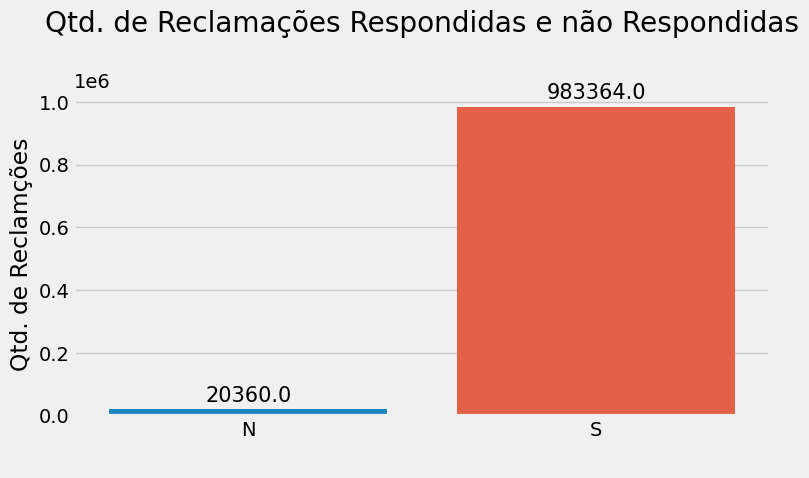

Reclamações Respondidas: 97.97%
Reclamações Não Respondidas: 2.03%


In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))

splot = sns.countplot(x=df_gov['Respondida'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 10), textcoords = 'offset points', size=15)
    
plt.title('Qtd. de Reclamações Respondidas e não Respondidas\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamções')
plt.show()

rec_rec = df_gov['Respondida'].value_counts(normalize=True)
print('Reclamações Respondidas: {:.2%}'.format(rec_rec[0]))
print('Reclamações Não Respondidas: {:.2%}'.format(rec_rec[1]))

- 2 - Qual A Quandidade de Solicitações(Reclamações) por Região?

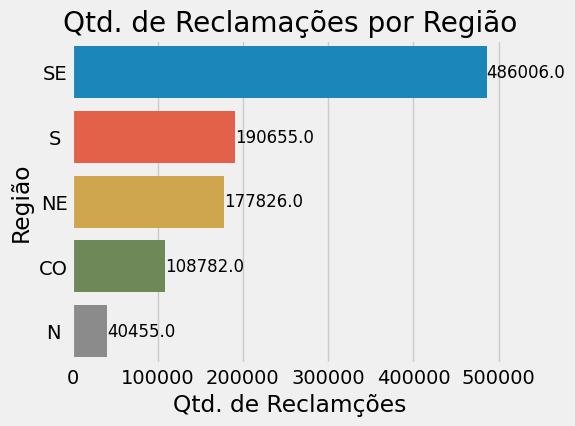

Reclamações Realizadas(SE): 48.42%
Reclamações Realizadas(S): 18.99%
Reclamações Realizadas(NE): 17.72%
Reclamações Realizadas(CO): 10.84%
Reclamações Realizadas(N): 4.03%


In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Região'], order=df_gov['Região'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(x,(x, y), size=12, va='center')

plt.title('Qtd. de Reclamações por Região')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('Região')
plt.show()

rec_uf = df_gov['Região'].value_counts(normalize=True)
print('Reclamações Realizadas(SE): {:.2%}'.format(rec_uf[0]))
print('Reclamações Realizadas(S): {:.2%}'.format(rec_uf[1]))
print('Reclamações Realizadas(NE): {:.2%}'.format(rec_uf[2]))
print('Reclamações Realizadas(CO): {:.2%}'.format(rec_uf[3]))
print('Reclamações Realizadas(N): {:.2%}'.format(rec_uf[4]))

- 3 - Qual A Quandidade de Solicitações(Reclamações) por UF?

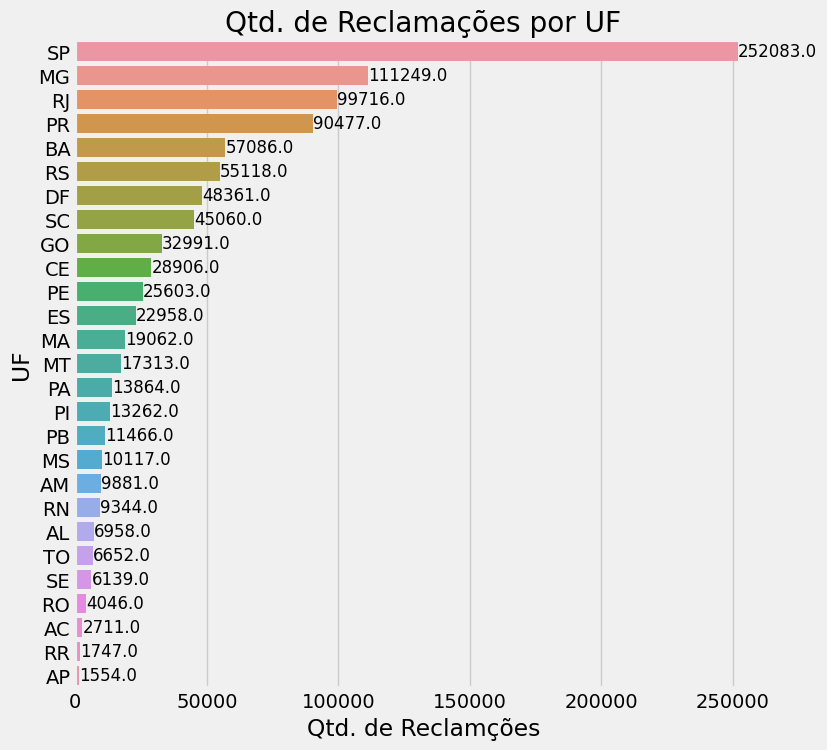

Reclamações realizadas - SP: 25.11% 
Reclamações realizadas - MG: 11.08% 
Reclamações realizadas - RJ: 9.93% 
Reclamações realizadas - PR: 9.01% 
Reclamações realizadas - BA: 5.69% 
Reclamações realizadas - RS: 5.49% 
Reclamações realizadas - DF: 4.82% 
Reclamações realizadas - SC: 4.49% 
Reclamações realizadas - GO: 3.29% 
Reclamações realizadas - CE: 2.88% 
Reclamações realizadas - PE: 2.55% 
Reclamações realizadas - ES: 2.29% 
Reclamações realizadas - MA: 1.90% 
Reclamações realizadas - MT: 1.72% 
Reclamações realizadas - PA: 1.38% 
Reclamações realizadas - PI: 1.32% 
Reclamações realizadas - PB: 1.14% 
Reclamações realizadas - MS: 1.01% 
Reclamações realizadas - AM: 0.98% 
Reclamações realizadas - RN: 0.93% 
Reclamações realizadas - AL: 0.69% 
Reclamações realizadas - TO: 0.66% 
Reclamações realizadas - SE: 0.61% 
Reclamações realizadas - RO: 0.40% 
Reclamações realizadas - AC: 0.27% 
Reclamações realizadas - RR: 0.17% 
Reclamações realizadas - AP: 0.15% 


In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.countplot(y=df_gov['UF'], order=df_gov['UF'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(x,(x, y), size=12, va='center')

plt.title('Qtd. de Reclamações por UF')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('UF')
plt.show()

uf_nor = df_gov['UF'].value_counts(normalize=True)
uf_nor = pd.DataFrame(uf_nor)
uf_nor.reset_index(inplace=True)
uf_nor.rename(columns=({'index':'UF','UF':'Qtd. de Reclamações'}), inplace=True)

j = 0
for i in uf_nor['UF']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,uf_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 4 - Qual A Quandidade de Solicitações(Reclamações) por Sexo?

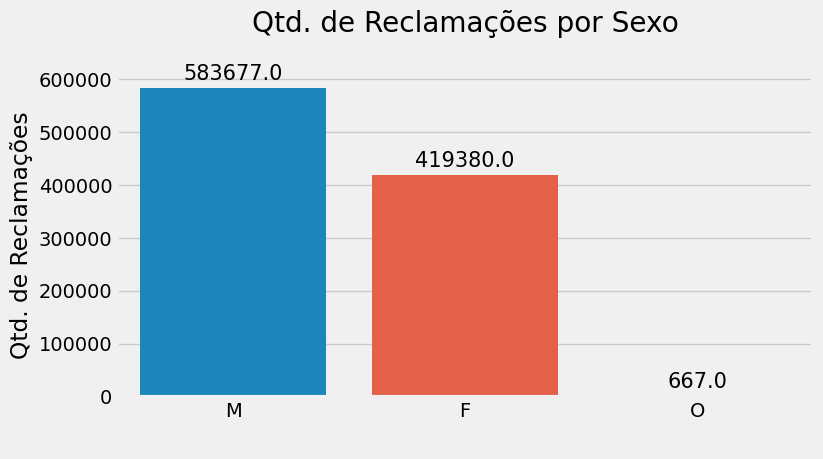

Reclamações Realiazadas(M): 58.15%
Reclamações Realiazadas(F): 41.78%
Reclamações Realiazadas(O): 0.07%


In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))

splot = sns.countplot(x=df_gov['Sexo'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 10), textcoords = 'offset points', size=15)
    
plt.title('Qtd. de Reclamações por Sexo\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamações')
plt.show()

rec_se = df_gov['Sexo'].value_counts(normalize=True)
print('Reclamações Realiazadas(M): {:.2%}'.format(rec_se[0]))
print('Reclamações Realiazadas(F): {:.2%}'.format(rec_se[1]))
print('Reclamações Realiazadas(O): {:.2%}'.format(rec_se[2]))

- 5 - Qual A Quandidade de Solicitações(Reclamações) por Faixa Etária?

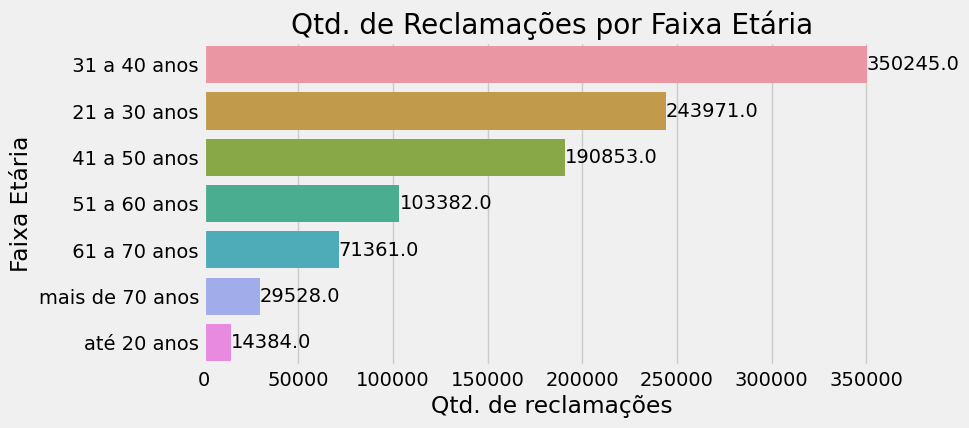

Reclamações Realizadas - Entre 31 a 40Anos: 34.89%
Reclamações Realizadas - Entre 21 a 30Anos: 24.31%
Reclamações Realizadas - Entre 41 a 50Anos: 19.01%
Reclamações Realizadas - Entre 51 a 60Anos: 10.30%
Reclamações Realizadas - Entre 61 a 70Anos: 7.11%
Reclamações Realizadas - Mais de 70Anos: 2.94%
Reclamações Realizadas - Até 20Anos: 1.43%


In [16]:
df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True)  

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))

splot = sns.countplot(y=df_gov['Faixa Etária'], order=df_gov['Faixa Etária'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(x,(x, y), size=14, va='center')

plt.title('Qtd. de Reclamações por Faixa Etária')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Faixa Etária')
plt.show()

rec_fe = df_gov['Faixa Etária'].value_counts(normalize=True)
print('Reclamações Realizadas - Entre 31 a 40Anos: {:.2%}'.format(rec_fe[0]))
print('Reclamações Realizadas - Entre 21 a 30Anos: {:.2%}'.format(rec_fe[1]))
print('Reclamações Realizadas - Entre 41 a 50Anos: {:.2%}'.format(rec_fe[2]))
print('Reclamações Realizadas - Entre 51 a 60Anos: {:.2%}'.format(rec_fe[3]))
print('Reclamações Realizadas - Entre 61 a 70Anos: {:.2%}'.format(rec_fe[4]))
print('Reclamações Realizadas - Mais de 70Anos: {:.2%}'.format(rec_fe[5]))
print('Reclamações Realizadas - Até 20Anos: {:.2%}'.format(rec_fe[6]))

- 6 - Qual A Quandidade de Solicitações(Reclamações) por Mês?

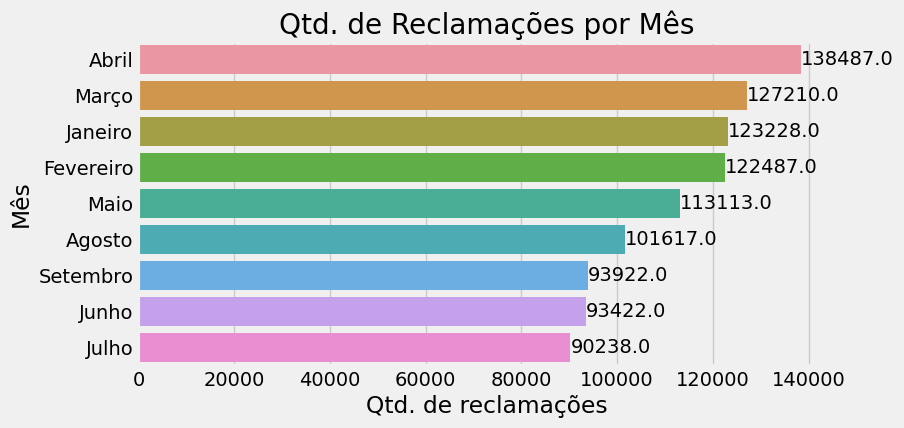

Reclamações realizadas - Abril: 13.80% 
Reclamações realizadas - Março: 12.67% 
Reclamações realizadas - Janeiro: 12.28% 
Reclamações realizadas - Fevereiro: 12.20% 
Reclamações realizadas - Maio: 11.27% 
Reclamações realizadas - Agosto: 10.12% 
Reclamações realizadas - Setembro: 9.36% 
Reclamações realizadas - Junho: 9.31% 
Reclamações realizadas - Julho: 8.99% 


In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))

splot = sns.countplot(y=df_gov['Mes Nome Finalização'], order=df_gov['Mes Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(x,(x, y), size=14, va='center')

plt.title('Qtd. de Reclamações por Mês')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.show()   

mes_nor = df_gov['Mes Nome Finalização'].value_counts(normalize=True)
mes_nor = pd.DataFrame(mes_nor)
mes_nor.reset_index(inplace=True)
mes_nor.rename(columns=({'index':'Mes Nome Finalização','Mes Nome Finalização':'Qtd. de Reclamações'}), inplace=True)

j = 0
for i in mes_nor['Mes Nome Finalização']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,mes_nor['Qtd. de Reclamações'][j]))
        j = j + 1     

- 7 - Qual a quantidade de solicitações(Reclamações) por Nome Fantasia(Empresa)

> 20 primeiro com mais solicitações(Reclamações)

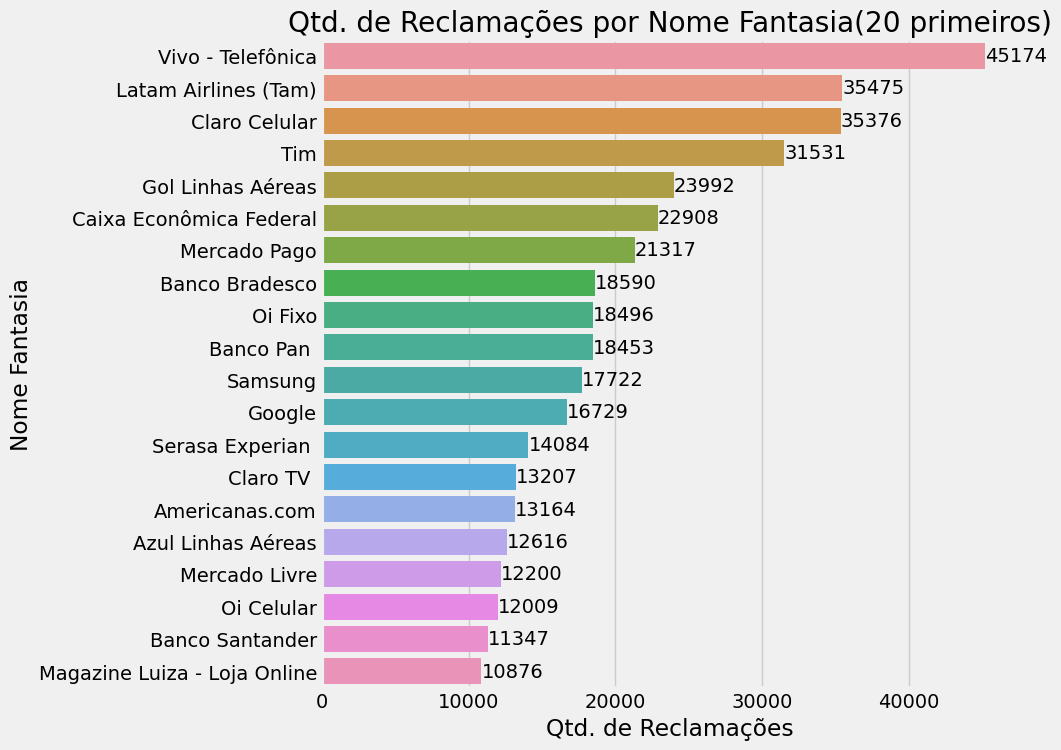

Reclamações realizadas - Vivo - Telefônica: 4.50% 
Reclamações realizadas - Latam Airlines (Tam): 3.53% 
Reclamações realizadas - Claro Celular: 3.52% 
Reclamações realizadas - Tim: 3.14% 
Reclamações realizadas - Gol Linhas Aéreas: 2.39% 
Reclamações realizadas - Caixa Econômica Federal: 2.28% 
Reclamações realizadas - Mercado Pago: 2.12% 
Reclamações realizadas - Banco Bradesco: 1.85% 
Reclamações realizadas - Oi Fixo: 1.84% 
Reclamações realizadas - Banco Pan : 1.84% 
Reclamações realizadas - Samsung: 1.77% 
Reclamações realizadas - Google: 1.67% 
Reclamações realizadas - Serasa Experian : 1.40% 
Reclamações realizadas - Claro TV : 1.32% 
Reclamações realizadas - Americanas.com: 1.31% 
Reclamações realizadas - Azul Linhas Aéreas: 1.26% 
Reclamações realizadas - Mercado Livre: 1.22% 
Reclamações realizadas - Oi Celular: 1.20% 
Reclamações realizadas - Banco Santander: 1.13% 
Reclamações realizadas - Magazine Luiza - Loja Online: 1.08% 


In [18]:
fant = df_gov['Nome Fantasia'].value_counts()
pd.DataFrame(fant)
fant2 = fant[0:20]
fant2 = pd.DataFrame(fant2)

fant2.reset_index(inplace=True)
fant2.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=fant2['Qtd. de Reclamações'], y=fant2['Nome Fantasia'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Nome Fantasia(20 primeiros)')         
plt.show()        
        
fant_nor = df_gov['Nome Fantasia'].value_counts(normalize=True)
fant_nor = pd.DataFrame(fant_nor)
fant_nor.reset_index(inplace=True)
fant_nor.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

fant_nor = fant_nor[0:20]

j = 0
for i in fant_nor['Nome Fantasia']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,fant_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 8 - Qual a quantidade de solicitações(Reclamações) por Segmento de Mercado

> 20 primeiro com mais solicitações(Reclamações)

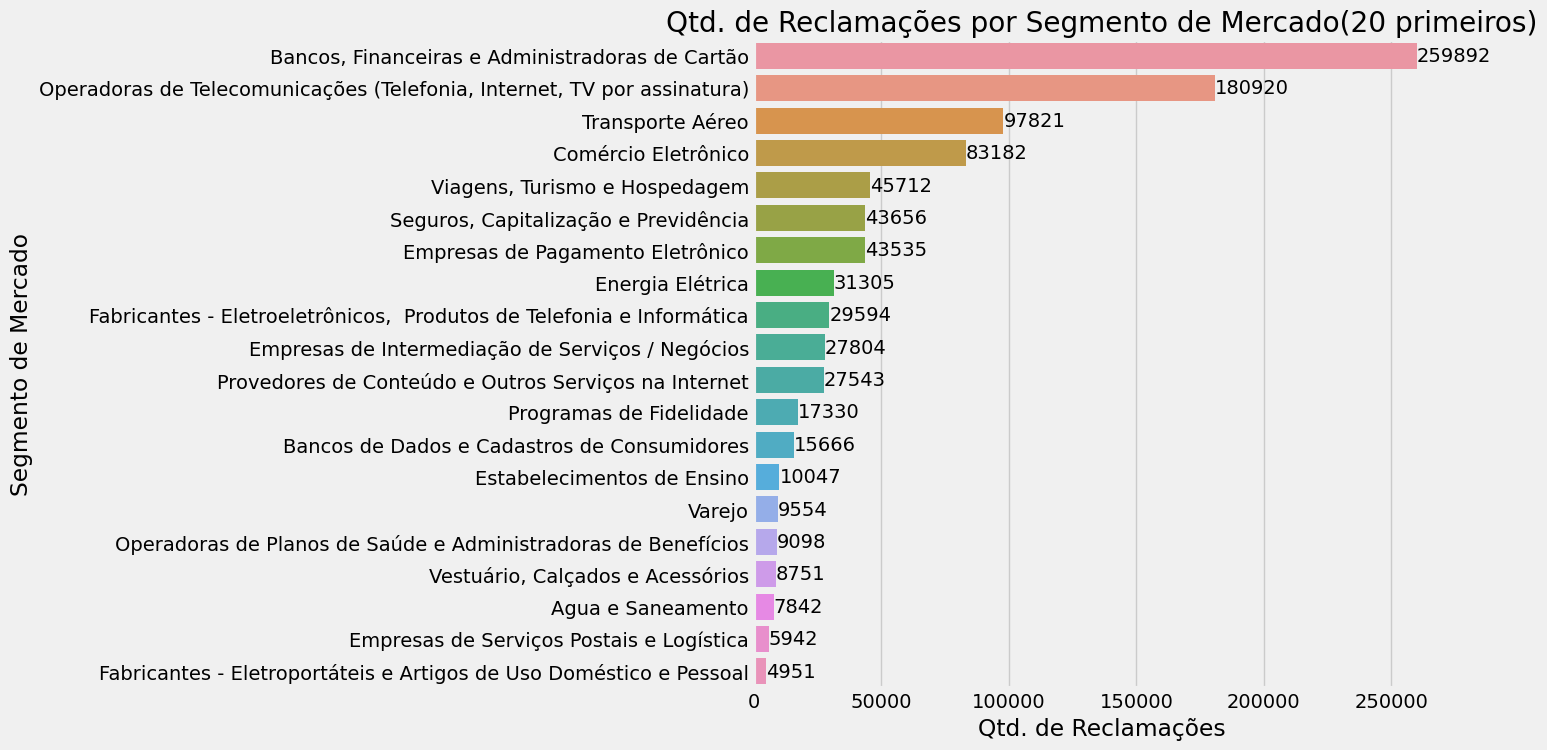

Reclamações realizadas - Bancos, Financeiras e Administradoras de Cartão: 25.89% 
Reclamações realizadas - Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura): 18.02% 
Reclamações realizadas - Transporte Aéreo: 9.75% 
Reclamações realizadas - Comércio Eletrônico: 8.29% 
Reclamações realizadas - Viagens, Turismo e Hospedagem: 4.55% 
Reclamações realizadas - Seguros, Capitalização e Previdência: 4.35% 
Reclamações realizadas - Empresas de Pagamento Eletrônico: 4.34% 
Reclamações realizadas - Energia Elétrica: 3.12% 
Reclamações realizadas - Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática: 2.95% 
Reclamações realizadas - Empresas de Intermediação de Serviços / Negócios: 2.77% 
Reclamações realizadas - Provedores de Conteúdo e Outros Serviços na Internet: 2.74% 
Reclamações realizadas - Programas de Fidelidade: 1.73% 
Reclamações realizadas - Bancos de Dados e Cadastros de Consumidores: 1.56% 
Reclamações realizadas - Estabelecimentos de Ensino: 1.

In [19]:
seg_merc = df_gov['Segmento de Mercado'].value_counts()
pd.DataFrame(seg_merc)
seg_merc2 = seg_merc[0:20]
seg_merc2 = pd.DataFrame(seg_merc2)

seg_merc2.reset_index(inplace=True)
seg_merc2.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=seg_merc2['Qtd. de Reclamações'], y=seg_merc2['Segmento de Mercado'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Segmento de Mercado(20 primeiros)')         
plt.show()        
        
seg_nor = df_gov['Segmento de Mercado'].value_counts(normalize=True)
seg_nor = pd.DataFrame(seg_nor)
seg_nor.reset_index(inplace=True)
seg_nor.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

seg_nor = seg_nor[0:20]

j = 0
for i in seg_nor['Segmento de Mercado']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,seg_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 9 - Qual a quantidade de solicitações(Reclamações) por Problema

> 20 primeiro com mais solicitações(Reclamações)

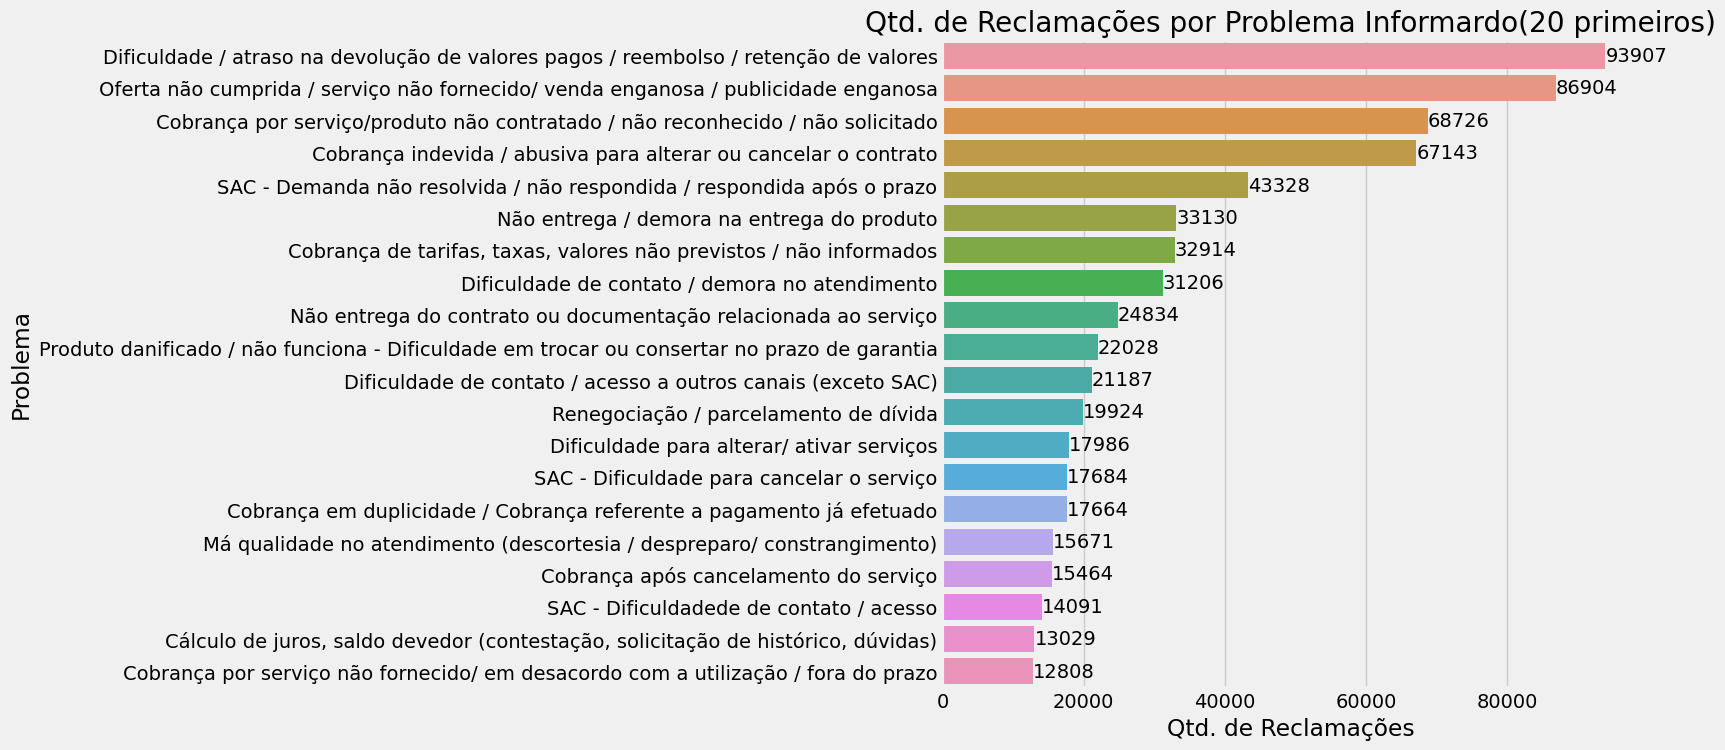

Reclamações realizadas - Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores: 9.36% 
Reclamações realizadas - Oferta não cumprida / serviço não fornecido/ venda enganosa / publicidade enganosa: 8.66% 
Reclamações realizadas - Cobrança por serviço/produto não contratado / não reconhecido / não solicitado: 6.85% 
Reclamações realizadas - Cobrança indevida / abusiva para alterar ou cancelar o contrato: 6.69% 
Reclamações realizadas - SAC - Demanda não resolvida / não respondida / respondida após o prazo: 4.32% 
Reclamações realizadas - Não entrega / demora na entrega do produto: 3.30% 
Reclamações realizadas - Cobrança de tarifas, taxas, valores não previstos / não informados: 3.28% 
Reclamações realizadas - Dificuldade de contato / demora no atendimento: 3.11% 
Reclamações realizadas - Não entrega do contrato ou documentação relacionada ao serviço: 2.47% 
Reclamações realizadas - Produto danificado / não funciona - Dificuldade em trocar ou consertar no pr

In [20]:
probl = df_gov['Problema'].value_counts()
pd.DataFrame(probl)
probl2 = probl[0:20]
probl2 = pd.DataFrame(probl2)

probl2.reset_index(inplace=True)
probl2.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)
probl2.head()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=probl2['Qtd. de Reclamações'], y=probl2['Problema'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Problema Informardo(20 primeiros)')         
plt.show()        
        
probl_nor = df_gov['Problema'].value_counts(normalize=True)
probl_nor = pd.DataFrame(probl_nor)
probl_nor.reset_index(inplace=True)
probl_nor.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)

probl_nor = probl_nor[0:20]

j = 0
for i in probl_nor['Problema']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,probl_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 10 - Qual a quantidade de solicitações(Reclamações) de como Comprou/Contratou

> 20 primeiro com mais solicitações(Reclamações)

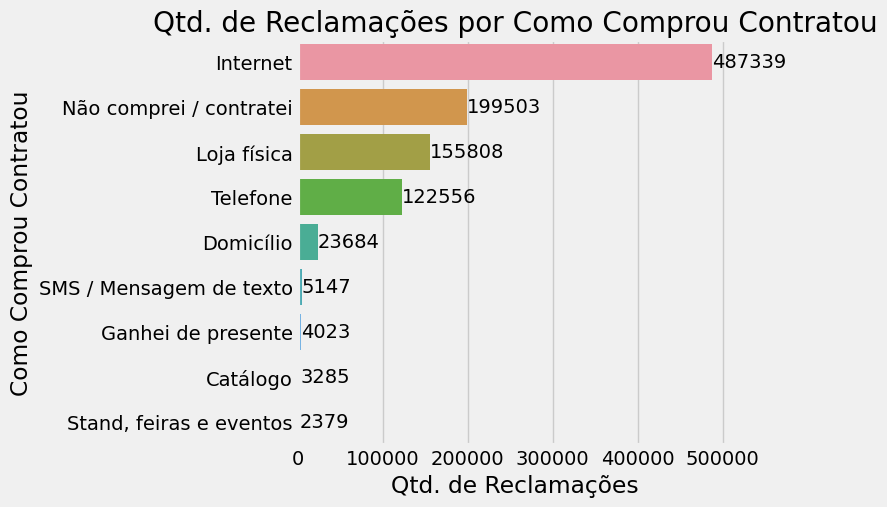

Reclamações realizadas - Internet: 48.55% 
Reclamações realizadas - Não comprei / contratei: 19.88% 
Reclamações realizadas - Loja física: 15.52% 
Reclamações realizadas - Telefone: 12.21% 
Reclamações realizadas - Domicílio: 2.36% 
Reclamações realizadas - SMS / Mensagem de texto: 0.51% 
Reclamações realizadas - Ganhei de presente: 0.40% 
Reclamações realizadas - Catálogo: 0.33% 
Reclamações realizadas - Stand, feiras e eventos: 0.24% 


In [21]:
comp = df_gov['Como Comprou Contratou'].value_counts()
comp = pd.DataFrame(comp)

comp.reset_index(inplace=True)
comp.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,5))

splot = sns.barplot(x=comp['Qtd. de Reclamações'], y=comp['Como Comprou Contratou'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Como Comprou Contratou')         
plt.show()        
        
com_nor = df_gov['Como Comprou Contratou'].value_counts(normalize=True)
com_nor = pd.DataFrame(com_nor)
com_nor.reset_index(inplace=True)
com_nor.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

j = 0
for i in com_nor['Como Comprou Contratou']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,com_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 11 - Verificando a Quantidade de reclamações por 'Segmento de Mercado','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [26]:
order_p1 = df_gov.groupby(['Segmento de Mercado','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p1 = order_p1.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p1['%'] = round((temp_df_p1['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p1 = temp_df_p1[0:20]

temp_df_p1.head(20)

,Segmento de Mercado,Problema,Como Comprou Contratou,Total Reclamações,%
0,Transporte Aéreo,Dificuldade / atraso na devolução de valores p...,Internet,21100,2.10
1,"Bancos, Financeiras e Administradoras de Cartão",Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,19629,1.96
2,Comércio Eletrônico,Oferta não cumprida / serviço não fornecido/ v...,Internet,17998,1.79
3,Comércio Eletrônico,Não entrega / demora na entrega do produto,Internet,16709,1.66
4,Comércio Eletrônico,Dificuldade / atraso na devolução de valores p...,Internet,14540,1.45
5,"Viagens, Turismo e Hospedagem",Dificuldade / atraso na devolução de valores p...,Internet,13344,1.33
6,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança indevida / abusiva para alterar ou ca...,Telefone,10474,1.04
7,"Bancos, Financeiras e Administradoras de Cartão",Não entrega do contrato ou documentação relaci...,Loja física,10161,1.01
8,"Operadoras de Telecomunicações (Telefonia, Int...",Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,9913,0.99
9,"Viagens, Turismo e Hospedagem",Oferta não cumprida / serviço não fornecido/ v...,Internet,8123,0.81


- 12 - Verificando a Quantidade de reclamações por 'Nome Fantasia','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [23]:
order_p2 = df_gov.groupby(['Nome Fantasia','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p2 = order_p2.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p2 = temp_df_p2[0:20]

temp_df_p2['%'] = round((temp_df_p2['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p2.head(20)

,Nome Fantasia,Problema,Como Comprou Contratou,Total Reclamações,%
0,Google,Dificuldade para alterar/ ativar serviços,Internet,6846,0.68
1,Latam Airlines (Tam),Dificuldade / atraso na devolução de valores p...,Internet,6315,0.63
2,Gol Linhas Aéreas,Dificuldade / atraso na devolução de valores p...,Internet,6024,0.60
3,Hurb - Hotel Urbano,Oferta não cumprida / serviço não fornecido/ v...,Internet,5761,0.57
4,Serasa Experian,"Coleta, uso ou compartilhamento indevido ou nã...",Não comprei / contratei,5062,0.50
5,Google,Dificuldade para alterar/ ativar serviços,Não comprei / contratei,4812,0.48
6,Decolar.com,Dificuldade / atraso na devolução de valores p...,Internet,4418,0.44
7,123 Milhas,Dificuldade / atraso na devolução de valores p...,Internet,3767,0.38
8,Samsung,Produto danificado / não funciona - Dificuldad...,Internet,3708,0.37
9,Shopee Brasil,Dificuldade / atraso na devolução de valores p...,Internet,3522,0.35


- 13 - Verificando o Tempo de Resposta das reclamações por 'Nome Fantasia','Tempo Resposta'

> 20 primeiros com mais solicitações(Reclamações)

In [24]:
order_p3 = df_gov.groupby(['Nome Fantasia'])['Tempo Resposta'].agg(['mean','count']).rename(columns={'count':'Total Reclamações','mean':'Media Tempo Resposta'})


temp_df_p3 = order_p3.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p3 = temp_df_p3[0:20]

temp_df_p3['%'] = round((temp_df_p3['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p3.head(20)

,Nome Fantasia,Media Tempo Resposta,Total Reclamações,%
0,Vivo - Telefônica,7.746469,45174,4.50
1,Latam Airlines (Tam),6.544355,35475,3.53
2,Claro Celular,7.727386,35376,3.52
3,Tim,6.787320,31531,3.14
4,Gol Linhas Aéreas,2.990288,23992,2.39
5,Caixa Econômica Federal,5.752837,22908,2.28
6,Mercado Pago,6.467420,21317,2.12
7,Banco Bradesco,7.859010,18590,1.85
8,Oi Fixo,6.801957,18496,1.84
9,Banco Pan,6.664716,18453,1.84


- 14 - Verificando a faixa Etária das reclamações por 'Sexo','Faixa Etária','Região','Nome Fantasia','Total Reclamações'

> 20 primeiros com mais solicitações(Reclamações)

In [25]:
order_p4 = df_gov.groupby(['Sexo','Faixa Etária','Região','Nome Fantasia'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p4 = order_p4.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p4 = temp_df_p4[0:20]

temp_df_p4['%'] = round((temp_df_p4['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p4.head(20)

,Sexo,Faixa Etária,Região,Nome Fantasia,Total Reclamações,%
0,M,31 a 40 anos,SE,Vivo - Telefônica,5581,0.56
1,M,31 a 40 anos,SE,Latam Airlines (Tam),4225,0.42
2,M,31 a 40 anos,SE,Claro Celular,3845,0.38
3,M,21 a 30 anos,SE,Vivo - Telefônica,3188,0.32
4,F,31 a 40 anos,SE,Vivo - Telefônica,3005,0.30
5,M,41 a 50 anos,SE,Vivo - Telefônica,2901,0.29
6,M,31 a 40 anos,SE,Tim,2813,0.28
7,F,31 a 40 anos,SE,Latam Airlines (Tam),2716,0.27
8,M,31 a 40 anos,SE,Samsung,2698,0.27
9,M,31 a 40 anos,SE,Mercado Pago,2631,0.26
